In [5]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect("compiled_gcbm_output.db")

In [89]:
query = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS NPP_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS NEP_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS NBP_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        WHERE i.indicator = 'NPP' and j.indicator = 'NEP' and k.indicator='NBP' 
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [90]:
df = pd.read_sql_query(query, conn)
df.head()

,year,NPP_mt,NEP_mt,NBP_mt
0,1900,0.131483,-13.477502,-13.477502
1,1901,0.393907,-11.644816,-11.644816
2,1902,0.670503,-10.221973,-10.221973
3,1903,0.962377,-9.032994,-9.032994
4,1904,1.265043,-7.991998,-7.991998


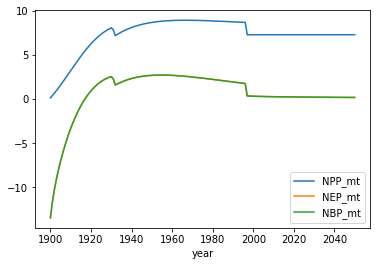

In [91]:
ax = df.plot.line("year") # x-axis

NEP = NBP due to having no disturbances in the simulation

In [73]:
query2 = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS CO2_emissions_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS DOM_emissions_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS Total_emissions_mt, COALESCE(SUM(l.flux_tc), 0) / 1e6 AS Rh_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        LEFT JOIN v_stock_change_indicators_density l
            ON years.year = l.year
        WHERE i.indicator = 'Total CO2 Emissions' and j.indicator = 'Total DOM Emissions' and k.indicator='Total Emissions' and l.indicator='Rh'
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [74]:
df2 = pd.read_sql_query(query2, conn)
df2.head()

,year,CO2_emissions_mt,DOM_emissions_mt,Total_emissions_mt,Rh_mt
0,1900,13.608986,13.608986,13.608986,13.608986
1,1901,12.038723,12.038723,12.038723,12.038723
2,1902,10.892476,10.892476,10.892476,10.892476
3,1903,9.995371,9.995371,9.995371,9.995371
4,1904,9.257041,9.257041,9.257041,9.257041


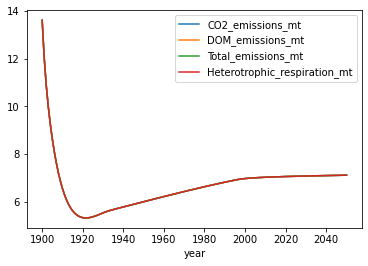

In [72]:
ax = df2.plot.line("year") # x-axis

NPP - Rh = NEP

NEP - DE = NBP

In [75]:
query3 = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS Deadwood_to_atmosphere_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS Decomposition_releases_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS Soil_to_atmosphere_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        WHERE i.indicator = 'Deadwood to Atmosphere' and j.indicator = 'Decomposition Releases' and k.indicator='Soil to Atmosphere' 
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [76]:
df3 = pd.read_sql_query(query3, conn)
df3.head()

,year,Deadwood_to_atmosphere_mt,Decomposition_releases_mt,Soil_to_atmosphere_mt
0,1900,11.300871,13.608986,1.954525
1,1901,10.469623,12.038723,1.245669
2,1902,9.684242,10.892476,0.890110
3,1903,8.949051,9.995371,0.714069
4,1904,8.266518,9.257041,0.630803


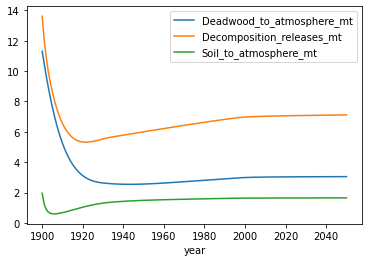

In [77]:
ax = df3.plot.line("year") # x-axis

In [78]:
query4 = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS Delta_total_biomass_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS Delta_total_DOM_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS Delta_total_ecosystem_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        WHERE i.indicator = 'Delta Total Biomass' and j.indicator = 'Delta Total DOM' and k.indicator='Delta Total Ecosystem' 
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [79]:
df4 = pd.read_sql_query(query4, conn)
df4.head()

,year,Delta_total_biomass_mt,Delta_total_DOM_mt,Delta_total_ecosystem_mt
0,1900,0.125671,-13.603173,-13.477502
1,1901,0.365453,-12.010269,-11.644816
2,1902,0.597861,-10.819834,-10.221973
3,1903,0.824975,-9.857969,-9.032994
4,1904,1.046987,-9.038985,-7.991998


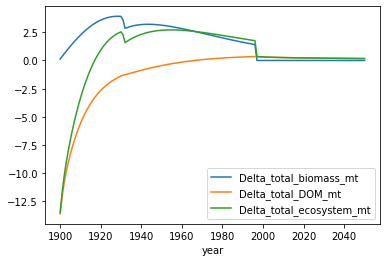

In [80]:
ax = df4.plot.line("year") # x-axis

Delta total ecosystem here is equal to NBP from graph 1

In [86]:
query5 = f"""
        SELECT years.year, COALESCE(SUM(i.flux_tc), 0) / 1e6 AS Total_detrital_transfers_mt, COALESCE(SUM(j.flux_tc), 0) / 1e6 AS Total_litterfall_mt, COALESCE(SUM(k.flux_tc), 0) / 1e6 AS Total_mortality_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_stock_change_indicators_density i
            ON years.year = i.year
        LEFT JOIN v_stock_change_indicators_density j
            ON years.year = j.year
        LEFT JOIN v_stock_change_indicators_density k
            ON years.year = k.year
        WHERE i.indicator = 'Total Detrital Transfers' and j.indicator = 'Total Litterfall' and k.indicator='Total Mortality' 
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

In [87]:
df5 = pd.read_sql_query(query5, conn)
df5.head()

,year,Total_detrital_transfers_mt,Total_litterfall_mt,Total_mortality_mt
0,1900,0.005813,0.005812,6.452322e-07
1,1901,0.028455,0.028448,7.042998e-06
2,1902,0.072642,0.072612,3.038052e-05
3,1903,0.137402,0.137316,8.543524e-05
4,1904,0.218056,0.212344,5.712028e-03


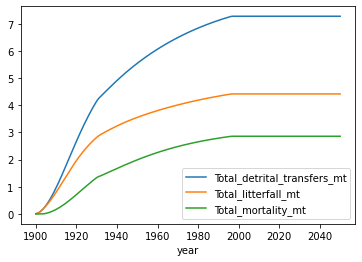

In [88]:
ax = df5.plot.line("year") # x-axis

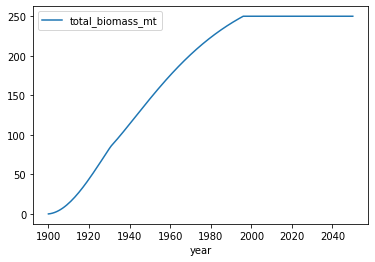

In [94]:
query6 = f"""
        SELECT years.year, COALESCE(SUM(i.pool_tc), 0) / 1e6 AS total_biomass_mt
        FROM (SELECT DISTINCT year FROM v_age_indicators ORDER BY year) AS years
        LEFT JOIN v_pool_indicators i
            ON years.year = i.year
        WHERE i.indicator = 'Total Biomass'
            AND (years.year BETWEEN 1900 AND 2050)
        GROUP BY years.year
        ORDER BY years.year
        """

df6 = pd.read_sql_query(query6, conn)
ax = df6.plot.line("year") # x-axis